In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('../data/final_dataset_v2.parquet')
df.head()

,index,county,date,daily_cases,daily_cases_by_population,daily_deaths,daily_deaths_by_population,POP2020,Partially Vaccinated,Fully Vaccinated,...,Number of ICU Beds By County,Number of ICU Beds Available By County,Total Beds By County per thousand ppl,Number of ICU Beds By County per thousand ppl,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Albany,2020-03-26,171,0.000543,0,0.000000,314848,0.0,0.0,...,80.0,43.0,3.795482,0.254091,-51.0,-11.0,43.0,-53.0,-55.0,23.0
1,110535,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
2,110536,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
3,110537,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
4,110538,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0


In [4]:
df_sorted = df.copy()
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted = df.sort_values(by=['Facility Name','date']).set_index(['Facility Name','date'])
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted.head()


county  daily_cases  \
Facility Name              date                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  Otsego            3   
                           2020-03-27  Otsego            5   
                           2020-03-28  Otsego            7   
                           2020-03-29  Otsego           10   
                           2020-03-30  Otsego           17   

                                       daily_cases_by_population  \
Facility Name              date                                    
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.000051   
                           2020-03-27                   0.000085   
                           2020-03-28                   0.000120   
                           2020-03-29                   0.000171   
                           2020-03-30                   0.000290   

                                       daily_deaths  \
Facility Name              date                       
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0   
                           2020-03-27             0   
                           2020-03-28             1   
                           2020-03-29             1   
                           2020-03-30             1   

                                       daily_deaths_by_population  POP2020  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                    0.000000    58524   
                           2020-03-27                    0.000000    58524   
                           2020-03-28                    0.000017    58524   
                           2020-03-29                    0.000017    58524   
                           2020-03-30                    0.000017    58524   

                                       Partially Vaccinated  Fully Vaccinated  \
Facility Name              date                                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.0               0.0   
                           2020-03-27                   0.0               0.0   
                           2020-03-28                   0.0               0.0   
                           2020-03-29                   0.0               0.0   
                           2020-03-30                   0.0               0.0   

                                       Non Vaccinated  \
Facility Name              date                         
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0.0   
                           2020-03-27             0.0   
                           2020-03-28             0.0   
                           2020-03-29             0.0   
                           2020-03-30             0.0   

                                       Partially Vaccinated per Population  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                                  0.0   
                           2020-03-27                                  0.0   
                           2020-03-28                                  0.0   
                           2020-03-29                                  0.0   
                           2020-03-30                                  0.0   

                                       ...  Number of ICU Beds By County  \
Facility Name              date        ...                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  ...                          14.0   
                           2020-03-27  ...                          14.0   
                           2020-03-28  ...                          14.0   
                           2020-03-29  ...                          14.0   
                           2020-03-30  ...                          14.0   

                                       Number of ICU Beds Available By County  \
Facility Name              date                                  

In [33]:
# subset nov - feb

subset = df_sorted.copy()
subset['day_of_week'] = subset.index.get_level_values('date').dayofweek
subset['day_of_month'] = subset.index.get_level_values('date').day
subset['overload'] = subset['Number of Beds Available'] + \
    subset['Number of ICU Beds Available'] - subset['Patients Newly Admitted']

# diff column with difference between yesterday and day
diff_cols = []
for i in range(1, 4):
    subset.loc[:, 'overload_T-' +
               str(i)] = subset.groupby(level=0)['overload'].shift(i)
    subset.loc[:, 'overload_T-' +
               str(i) + '_diff'] = subset.groupby(level=0)['overload_T-'+str(i)].diff()
    diff_cols.append('overload_T-' +
                     str(i))
    diff_cols.append('overload_T-'+str(i) + '_diff')

# for col in ['Partially Vaccinated', 'Fully Vaccinated', 'Non Vaccinated']:
#     subset.loc[:, col+'_diff'] = subset.groupby(level=0)[col].diff()
#     # diff_cols.append(col)
#     diff_cols.append(col+'_diff')

# overload 7 day in future
subset.loc[:, 'overload-14day'] = subset.groupby(level=0)['overload'].shift(14)
# dropping NAs
subset = subset.dropna()

target = 'overload-14day'
cols = ['overload-14day', 'overload', *diff_cols, 'day_of_week', 'day_of_month',
        'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']

subset_temp_test = subset[(subset.index.get_level_values('date') > '2021-11-30')]
subset = subset[cols]
# subset = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                 (subset.index.get_level_values('date') <= '2022-01-31')]

subset_test = subset[(subset.index.get_level_values('date') > '2021-11-30')]
subset = subset[(subset.index.get_level_values('date') <= '2021-11-30')]

subset.tail(10)


# subset_train = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                       (subset.index.get_level_values('date') <= '2022-01-31')]
# subset_test = subset[(subset.index.get_level_values('date') >= '2022-02-01') &
#                      (subset.index.get_level_values('date') <= '2022-02-28')]
# subset_train.shape, subset_test.shape


overload-14day  overload  \
Facility Name                     date                                   
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21            -3.0      -1.0   
                                  2021-11-22             0.0      -2.0   
                                  2021-11-23            -4.0       2.0   
                                  2021-11-24            -1.0      -2.0   
                                  2021-11-25            -2.0      -2.0   
                                  2021-11-26            -1.0      -4.0   
                                  2021-11-27            -1.0      -2.0   
                                  2021-11-28            -4.0      -3.0   
                                  2021-11-29             0.0      -2.0   
                                  2021-11-30            -2.0      -5.0   

                                              overload_T-1  overload_T-1_diff  \
Facility Name                     date                                          
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21           0.0                2.0   
                                  2021-11-22          -1.0               -1.0   
                                  2021-11-23          -2.0               -1.0   
                                  2021-11-24           2.0                4.0   
                                  2021-11-25          -2.0               -4.0   
                                  2021-11-26          -2.0                0.0   
                                  2021-11-27          -4.0               -2.0   
                                  2021-11-28          -2.0                2.0   
                                  2021-11-29          -3.0               -1.0   
                                  2021-11-30          -2.0                1.0   

                                              overload_T-2  overload_T-2_diff  \
Facility Name                     date                                          
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21          -2.0               -1.0   
                                  2021-11-22           0.0                2.0   
                                  2021-11-23          -1.0               -1.0   
                                  2021-11-24          -2.0               -1.0   
                                  2021-11-25           2.0                4.0   
                                  2021-11-26          -2.0               -4.0   
                                  2021-11-27          -2.0                0.0   
                                  2021-11-28          -4.0               -2.0   
                                  2021-11-29          -2.0                2.0   
                                  2021-11-30          -3.0               -1.0   

                                              overload_T-3  overload_T-3_diff  \
Facility Name                     date                                          
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21          -1.0                1.0   
                                  2021-11-22          -2.0               -1.0   
                                  2021-11-23           0.0                2.0   
                                  2021-11-24          -1.0               -1.0   
                                  2021-11-25          -2.0               -1.0   
                                  2021-11-26           2.0                4.0   
                                  2021-11-27          -2.0               -4.0   
                                  2021-11-28          -2.0                0.0   
                                  2021-11-29          -4.0               -2.0   
                                  2021-11-30          -2.0                2.0   

                                              day_of_week  day_of_month  \
Facility Name                     date                                    
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21            6            21   
             

In [6]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [7]:
# !pip3 install xgboost

/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


---------LR----------
LR: 0.841222 (0.059706)
---------XGB----------


/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pa

XGB: 0.832923 (0.048885)
---------RF----------
RF: 0.815837 (0.055534)


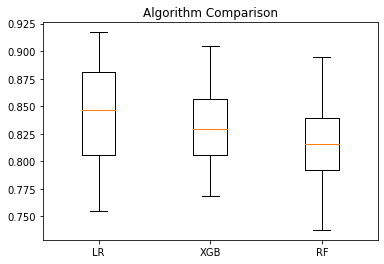

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = []
models.append(('LR', LinearRegression()))
# models.append(('NN', MLPRegressor(solver='lbfgs')))  # neural network
# models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB', XGBRegressor()))
# Ensemble method - collection of many decision trees
models.append(('RF', RandomForestRegressor(n_estimators=10)))
# models.append(('SVR', SVR(gamma='auto')))  # kernel = linear

X_cols = ['date', 'Facility Name', *cols[1:]]
y_cols = target

# Evaluate each model in turn
results = []
names = []
feature_importances = {}
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=4)
    cv_results = []
    feature_importances[name] = []
    print(f"---------{name}----------")
    for train_index, test_index in tscv.split(subset):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'],
                                                                                       columns='level_2').drop([target], axis=1), subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'], columns='level_2').drop([target], axis=1)
        y_train, y_test = subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=[
            'Facility Name', 'date'], columns='level_2')[target], subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=[
                'Facility Name', 'date'], columns='level_2')[target]
        # print(y_train)

        clf = model
        _ = clf.fit(X_train, y_train)
        feature_importances[name].append(_)

        preds = clf.predict(X_test)
        # accuracy for the current fold only
        r2score = clf.score(X_test, y_test)
        cv_results.append(r2score)
        # regression_results(y_test, preds)

    # cv_results = cross_val_score(
    #     model, X_train, y_train, cv=tscv, scoring='r2')
    cv_results = np.asarray(cv_results)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


/Users/gonicknalwa/Desktop/cmpt-733-term-project/notebooks/helper.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model.feature_names_in_, rotation=90)
/Users/gonicknalwa/Desktop/cmpt-733-term-project/notebooks/helper.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model.feature_names_in_, rotation=90)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

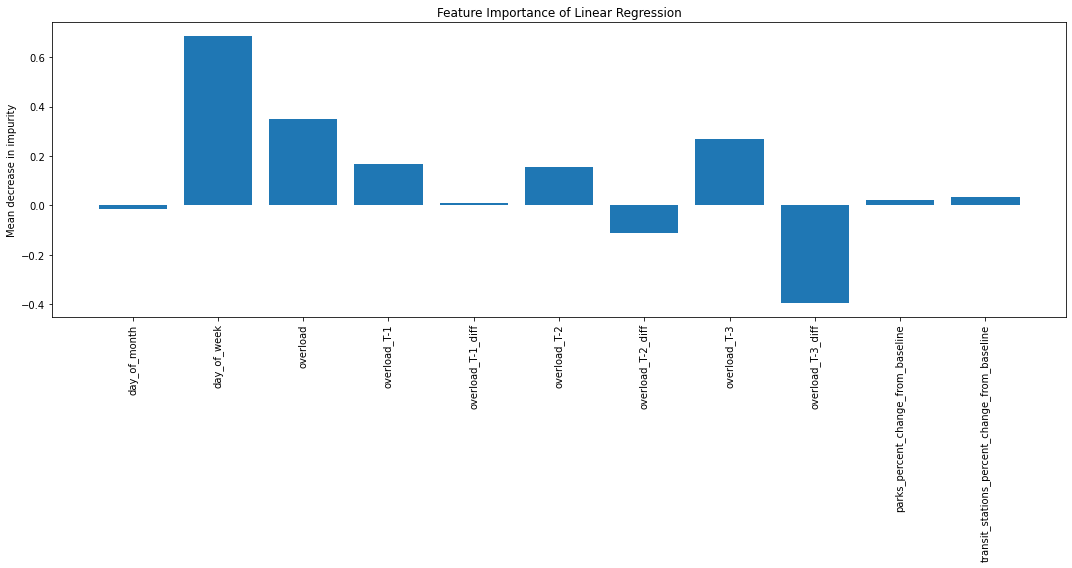

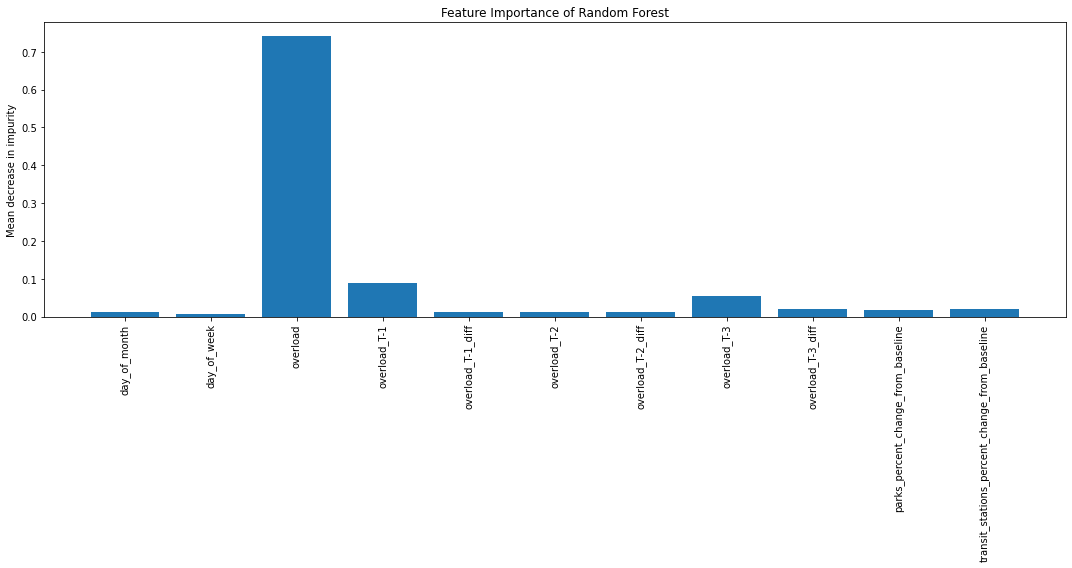

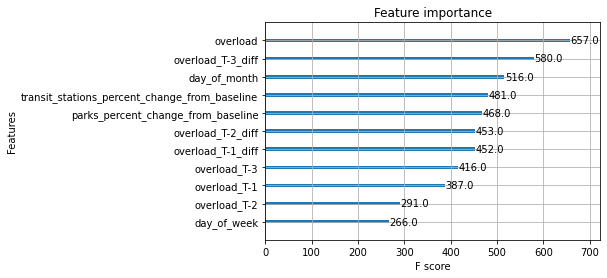

In [9]:
import importlib
import helper
import xgboost
importlib.reload(helper)
#Feature Importance of LR
_model = feature_importances['LR'][1]
helper.plot_feature_importance(_model, title="Feature Importance of Linear Regression")

#Feature Importance of RF
_model = feature_importances['RF'][1]
helper.plot_feature_importance(_model, title="Feature Importance of Random Forest")

f = _model.feature_names_in_
_model = feature_importances['XGB'][1]
# _model.get_booster().feature_names = f
xgboost.plot_importance(_model.get_booster())
# helper.plot_feature_importance(_model, title="Feature Importance of XGB", x_cols=f_cols)


/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


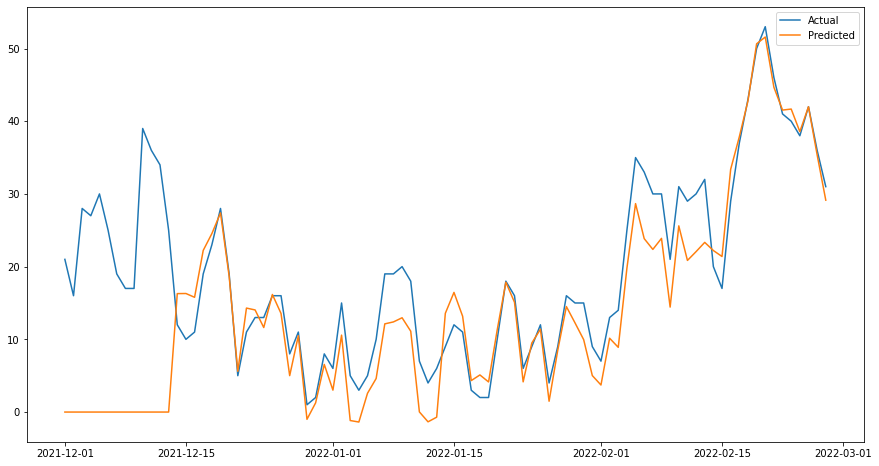

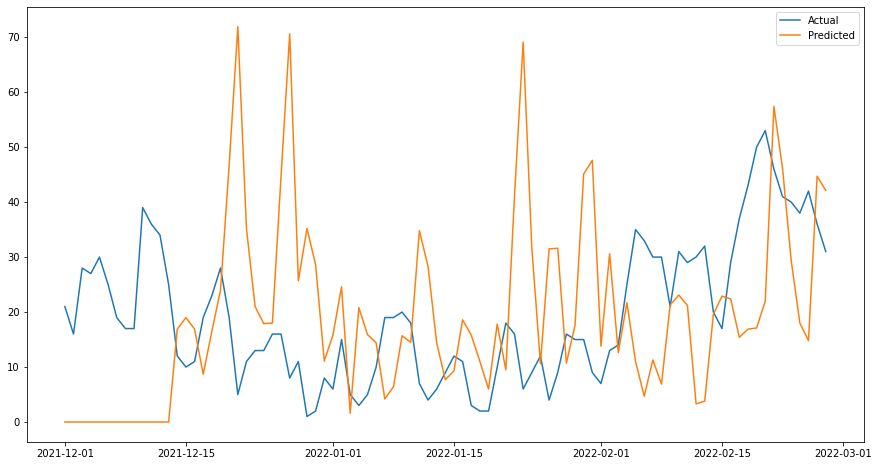

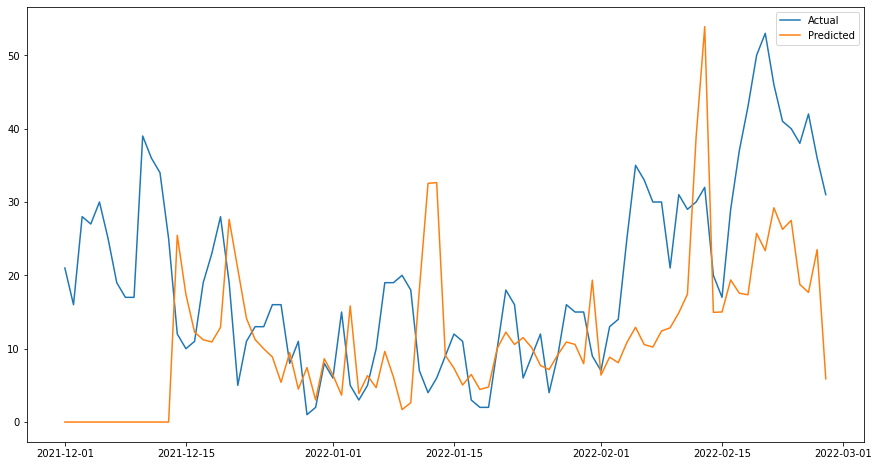

In [10]:
import matplotlib.pyplot as plt
model1 = feature_importances['LR'][1]
model2 = feature_importances['RF'][1]
model3 = feature_importances['XGB'][1]


def plot_predictions(model, analyse_hsp="AUBURN MEMORIAL HOSPITAL"):
    test_set = subset_test[subset_test.index.get_level_values(
        'Facility Name') == analyse_hsp]
    test_X = test_set.drop(target, axis=1)

    y_preds = model.predict(test_X)
    y_test = test_set[y_cols]

    x = [0]*13
    l = len(y_preds) - 13
    x += y_preds[:l].tolist()
    # len(x)

    # y_test.shape,y_preds.shape,
    # # print(y_test)
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(test_X.index.get_level_values('date'), y_test)
    ax.plot(test_X.index.get_level_values('date'), x)
    ax.legend(['Actual', 'Predicted'])
# # subset_test


plot_predictions(model1)
plot_predictions(model2)
plot_predictions(model3)


In [11]:
import importlib
import helper
importlib.reload(helper)
import warnings
warnings.filterwarnings('ignore')
helper.top_k_hsp_predction_loss(model1, subset_test, target, 10)


Loss Min:  15.995332955098563  | Loss Max:  13454.729814909755


[('STRONG MEMORIAL HOSPITAL', 1717.7235250948315),
 ('MONTEFIORE MEDICAL CENTER - HENRY AND LUCY MOSES DIV', 2046.734230482698),
 ('SOUTHSIDE HOSPITAL', 2115.908558390885),
 ('MAIMONIDES MEDICAL CENTER', 2352.961032470124),
 ('MEMORIAL HOSPITAL FOR CANCER AND ALLIED DISEASES', 2543.0739585323445),
 ('HOSPITAL FOR SPECIAL SURGERY', 2622.2118323196473),
 ('MOUNT SINAI HOSPITAL', 3489.025189777767),
 ('NYU LANGONE HOSPITALS', 4569.310747961047),
 ('UNIVERSITY HOSPITAL', 9304.270414755549),
 ('LONG ISLAND JEWISH MEDICAL CENTER', 13454.729814909755)]

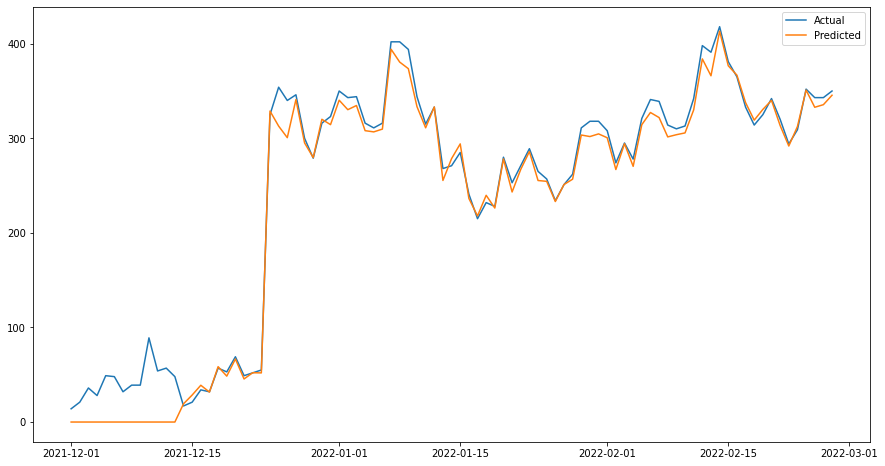

In [12]:
plot_predictions(model1,'LONG ISLAND JEWISH MEDICAL CENTER')

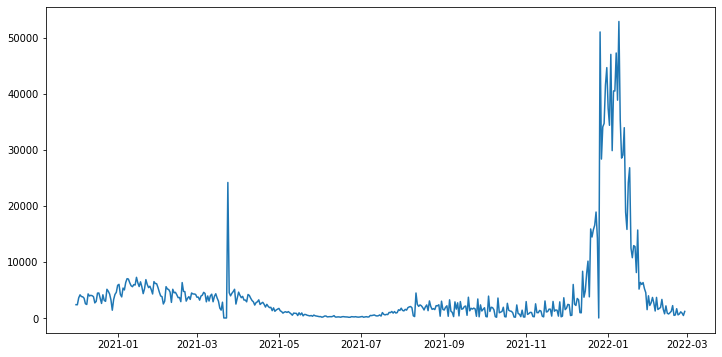

In [13]:
x = df_sorted.copy()
x.loc[:, 'daily_cases_diff'] = x.loc[:,'daily_cases'].diff()
x = x[(x.index.get_level_values('date') > '2020-11-30')]
x = x.dropna()
x = x[x.index.get_level_values('Facility Name') == 'LONG ISLAND JEWISH MEDICAL CENTER']

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x.index.get_level_values('date'), x['daily_cases_diff'])
# ax.plot(x.index.get_level_values('date'), x)


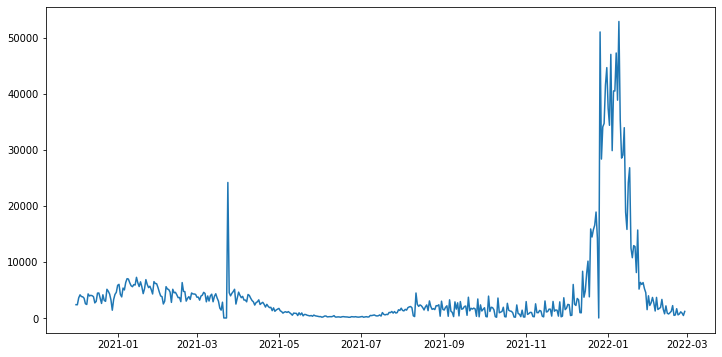

In [14]:
x = df_sorted.copy()
x = x[x.index.get_level_values('Facility Name') == 'LONG ISLAND JEWISH MEDICAL CENTER']
x.loc[:, 'daily_cases_diff'] = x.loc[:,'daily_cases'].diff()
x = x[(x.index.get_level_values('date') > '2020-11-30')]
x = x.dropna()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x.index.get_level_values('date'), x['daily_cases_diff'])

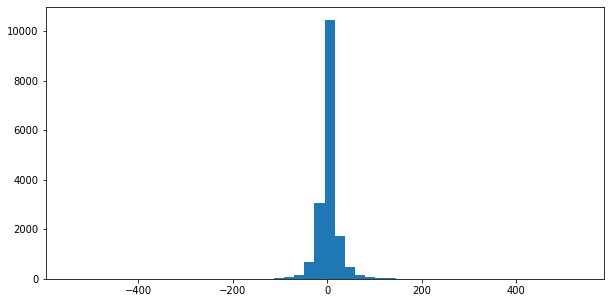

In [30]:
# box plot of error & Accuracy
import importlib
import helper
importlib.reload(helper)

helper.residual(model1,subset_test,target)
# errors, accuracy = helper.get_accuracy_error(model1, subset_test, target)
# plt.boxplot([errors], labels=['errors'])
# plt.title('Mean squared error  vs R2')
# plt.show()


In [26]:
pd.Series(errors).describe()

count    190.000000
mean      13.451609
std       10.386275
min        3.334653
25%        5.599963
50%       10.430359
75%       16.984031
max       77.492898
dtype: float64

In [100]:
#Plot Prediction VS ACtual of County overload on a day.
temp = subset_temp_test.copy()
X  = temp[cols].drop(target,axis=1)
temp['predicted'] =  model.predict(X)
temp['predicted_availability'] =  temp['predicted']/temp['Total Beds']
temp['actual_availability'] =  temp['overload-14day']/temp['Total Beds']
temp.replace([np.inf, -np.inf], 0, inplace=True)
temp['class_predicted'] =(temp['predicted_availability'] < 0.3).astype(int)
temp['class_actual'] =(temp['actual_availability'] < 0.3).astype(int)
temp

county  daily_cases  \
Facility Name                     date                               
A.O. FOX MEMORIAL HOSPITAL        2021-12-01   Otsego         5411   
                                  2021-12-02   Otsego         5466   
                                  2021-12-03   Otsego         5533   
                                  2021-12-04   Otsego         5574   
                                  2021-12-05   Otsego         5615   
...                                               ...          ...   
WYOMING COUNTY COMMUNITY HOSPITAL 2022-02-23  Wyoming         8206   
                                  2022-02-24  Wyoming         8212   
                                  2022-02-25  Wyoming         8215   
                                  2022-02-26  Wyoming         8216   
                                  2022-02-27  Wyoming         8219   

                                              daily_cases_by_population  \
Facility Name                     date                                    
A.O. FOX MEMORIAL HOSPITAL        2021-12-01                   0.092458   
                                  2021-12-02                   0.093398   
                                  2021-12-03                   0.094542   
                                  2021-12-04                   0.095243   
                                  2021-12-05                   0.095944   
...                                                                 ...   
WYOMING COUNTY COMMUNITY HOSPITAL 2022-02-23                   0.202462   
                                  2022-02-24                   0.202610   
                                  2022-02-25                   0.202684   
                                  2022-02-26                   0.202709   
                                  2022-02-27                   0.202783   

                                              daily_deaths  \
Facility Name                     date                       
A.O. FOX MEMORIAL HOSPITAL        2021-12-01            63   
                                  2021-12-02            66   
                                  2021-12-03            66   
                                  2021-12-04            66   
                                  2021-12-05            68   
...                                                    ...   
WYOMING COUNTY COMMUNITY HOSPITAL 2022-02-23            82   
                                  2022-02-24            82   
                                  2022-02-25            82   
                                  2022-02-26            82   
                                  2022-02-27            82   

                                              daily_deaths_by_population  \
Facility Name                     date                                     
A.O. FOX MEMORIAL HOSPITAL        2021-12-01                    0.001076   
                                  2021-12-02                    0.001128   
                                  2021-12-03                    0.001128   
                                  2021-12-04                    0.001128   
                                  2021-12-05                    0.001162   
...                                                                  ...   
WYOMING COUNTY COMMUNITY HOSPITAL 2022-02-23                    0.002023   
                                  2022-02-24                    0.002023   
                                  2022-02-25                    0.002023   
                                  2022-02-26                    0.002023   
                                  2022-02-27                    0.002023   

                                              POP2020  Partially Vaccinated  \
Facility Name                     date                                        
A.O. FOX MEMORIAL HOSPITAL        2021-12-01    58524               37425.0   
                                  2021-12-02    58524               37479.0   
                                  2021-12-03    

In [101]:
temp1 = temp.groupby(by=['county','date']).sum()
temp1 = temp1[['class_actual','class_predicted']]
temp1.head()

class_actual  class_predicted
county date                                     
Albany 2021-12-01             2                2
       2021-12-02             2                2
       2021-12-03             2                2
       2021-12-04             2                2
       2021-12-05             2                2

In [102]:
temp2 =temp.reset_index().groupby(by=['county','date']).count()
temp2 = temp2[['Facility Name']]
temp2

Facility Name
county date                     
Albany 2021-12-01              2
       2021-12-02              2
       2021-12-03              2
       2021-12-04              2
       2021-12-05              2
...                          ...
Yates  2022-02-23              1
       2022-02-24              1
       2022-02-25              1
       2022-02-26              1
       2022-02-27              1

[4717 rows x 1 columns]

In [103]:
joined = temp1.join(temp2)
joined = joined.rename(
    columns={'Facility Name': 'total_hsp', 'class_actual': 'actual_overloaded_hsp', 'class_predicted': 'predicted_overloaded_hsp'})
joined['actual_overload_%'] = joined['actual_overloaded_hsp']/joined['total_hsp']
joined['predicted_overload_%'] = joined['predicted_overloaded_hsp']/joined['total_hsp']
joined


actual_overloaded_hsp  predicted_overloaded_hsp  total_hsp  \
county date                                                                     
Albany 2021-12-01                      2                         2          2   
       2021-12-02                      2                         2          2   
       2021-12-03                      2                         2          2   
       2021-12-04                      2                         2          2   
       2021-12-05                      2                         2          2   
...                                  ...                       ...        ...   
Yates  2022-02-23                      1                         1          1   
       2022-02-24                      1                         0          1   
       2022-02-25                      1                         0          1   
       2022-02-26                      1                         0          1   
       2022-02-27                      1                         0          1   

                   actual_overload_%  predicted_overload_%  
county date                                                 
Albany 2021-12-01                1.0                   1.0  
       2021-12-02                1.0                   1.0  
       2021-12-03                1.0                   1.0  
       2021-12-04                1.0                   1.0  
       2021-12-05                1.0                   1.0  
...                              ...                   ...  
Yates  2022-02-23                1.0                   1.0  
       2022-02-24                1.0                   0.0  
       2022-02-25                1.0                   0.0  
       2022-02-26                1.0                   0.0  
       2022-02-27                1.0                   0.0  

[4717 rows x 5 columns]

In [75]:
import matplotlib.colors as colors
import mapclassify
import contextily as cx
# import geoplot
%matplotlib inline


def plot_geo_data(df, col_name, ax, fig, title="", show_base_cbar=False, show_base_map=False, cmap='Reds'):
    k = 1600  # I find that the more colors, the smoother the viz becomes as data points are spread across gradients
    cmap = cmap
    figsize = (20, 15)
    scheme = 'Quantiles'
    crs = {'init': 'epsg:4326'}

    subset = df.copy()
    subset['pop_density'] = subset['POP2020']/subset['CALC_SQ_MI']

    subset = subset.to_crs(crs)
    subset.plot(column=col_name, cmap=cmap, figsize=figsize, ax=ax,
                scheme=scheme, k=k, legend=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Adding Colorbar for legibility

    # normalize color
    vmin, vmax, vcenter = subset[col_name].min(
    ), subset[col_name].max(), subset[col_name].mean()
    divnorm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    # create a normalized colorbar
    if show_base_cbar:
        cbar = plt.cm.ScalarMappable(norm=divnorm, cmap=cmap)
        fig.colorbar(cbar, ax=ax)
    ax.set(title=title,
           ylabel="Lattitude", xlabel="Longitude")
    if show_base_map:
        cx.add_basemap(ax, crs=crs, source=cx.providers.Stamen.TonerLite)
# plt.show()

In [98]:
import geopandas as gpd
street_map = gpd.read_file('../data/NYS_Civil_Boundaries.shp.zip',)


In [107]:
date='2022-01-01'
df_temp = joined.copy()
df_temp = df_temp[df_temp.index.get_level_values('date')==date].reset_index()
df_temp = df_temp.rename(columns={'county':'COUNTY'})
df_temp  = pd.merge(street_map,df_temp,on='COUNTY', how='left')
df_temp


,NAME,MUNI_TYPE,MUNITYCODE,COUNTY,GNIS_ID,FIPS_CODE,SWIS,POP1990,POP2000,POP2010,...,DATEMOD,Shape_Leng,Shape_Area,geometry,date,actual_overloaded_hsp,predicted_overloaded_hsp,total_hsp,actual_overload_%,predicted_overload_%
0,Adams,town,2,Jefferson,978655,3604500210,222000,4977,4782,5143,...,2018-11-06,41971.838963,1.097164e+08,"POLYGON ((419711.937 4860894.762, 420725.148 4...",2022-01-01,2.0,1.0,3.0,0.666667,0.333333
1,Addison,town,2,Steuben,978656,3610100287,462000,2645,2640,2595,...,2018-03-01,33582.894334,6.676390e+07,"POLYGON ((311738.502 4672651.742, 312215.800 4...",2022-01-01,1.0,1.0,3.0,0.333333,0.333333
2,Afton,town,2,Chenango,978657,3601700353,082000,2972,2977,2851,...,2017-09-01,56181.056904,1.208935e+08,"POLYGON ((457510.038 4679307.408, 457514.525 4...",2022-01-01,1.0,0.0,1.0,1.000000,0.000000
3,Alabama,town,2,Genesee,978658,3603700474,182000,1998,1881,1869,...,2018-02-12,48055.772466,1.352914e+08,"POLYGON ((223125.570 4780997.861, 224223.622 4...",2022-01-01,1.0,2.0,2.0,0.500000,1.000000
4,Albany,city,1,Albany,978659,3600101000,010100,101082,95658,97856,...,2017-11-10,52588.062435,5.695384e+07,"POLYGON ((594045.717 4729421.064, 594243.246 4...",2022-01-01,2.0,2.0,2.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Yates,town,2,Orleans,979659,3607383448,343800,2497,2510,2559,...,2018-02-12,40709.556518,9.695020e+07,"POLYGON ((226757.638 4808118.677, 226761.860 4...",2022-01-01,0.0,0.0,1.0,0.000000,0.000000
991,Yonkers,city,1,Westchester,979660,3611984000,551800,188082,196086,195976,...,2019-10-04,34140.740512,5.243058e+07,"POLYGON ((599793.514 4537089.663, 599809.944 4...",2022-01-01,7.0,10.0,13.0,0.538462,0.769231
992,York,town,2,Livingston,979661,3605184022,245200,3513,3219,3397,...,2018-01-25,65790.742827,1.271513e+08,"POLYGON ((272662.887 4754509.659, 272671.016 4...",2022-01-01,0.0,0.0,1.0,0.000000,0.000000
993,Yorkshire,town,2,Cattaraugus,979662,3600984055,048400,3905,4210,3913,...,None,45417.163274,9.594904e+07,"POLYGON ((215516.084 4714867.418, 215511.920 4...",2022-01-01,1.0,1.0,1.0,1.000000,1.000000


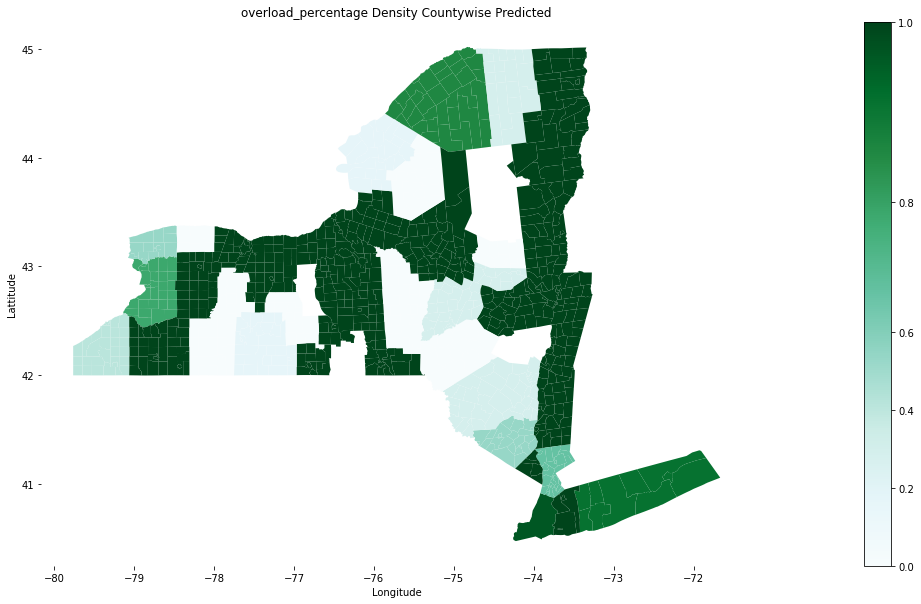

In [108]:
fig, ax = plt.subplots(figsize=(40, 10))
plot_geo_data(df_temp, 'predicted_overload_%', ax=ax, fig=fig, show_base_cbar=True,cmap='BuGn',title='overload_percentage Density Countywise Predicted')

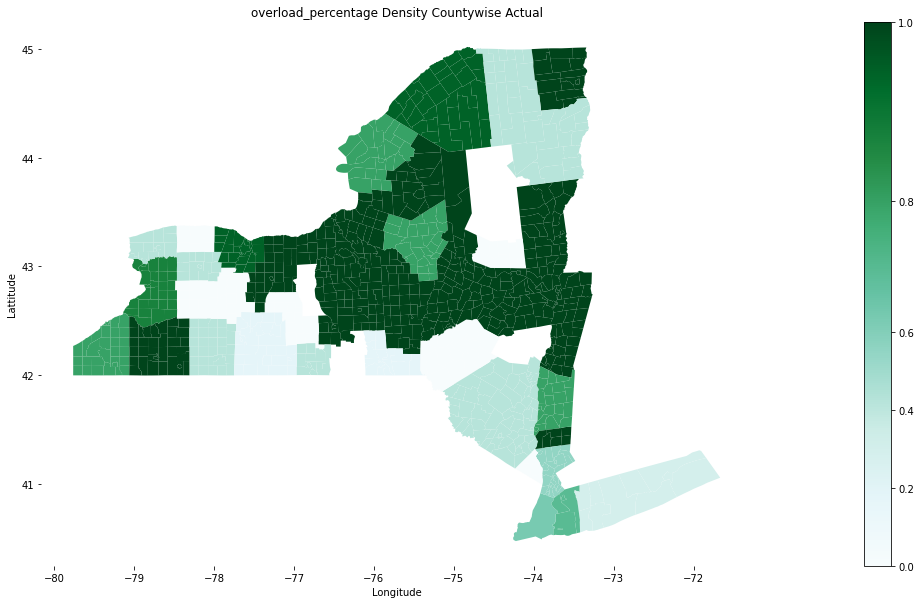

In [109]:
fig, ax = plt.subplots(figsize=(40, 10))
plot_geo_data(df_temp, 'actual_overload_%', ax=ax, fig=fig, show_base_cbar=True,cmap='BuGn',title='overload_percentage Density Countywise Actual')